### Import all The Libraries 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy
import pandas as pd
import pymysql
import warnings
warnings.filterwarnings('ignore')

In [4]:
#pip3 install pymysql
#pip3 install ipython-sql
#pip install mysqlclient

### Connect mysql with Jupyter 

In [15]:
conn=pymysql.connect(host='localhost',user='root',passwd='swati@03',db='acceron')


### Load All the Required Tables.

#### Product Order table

In [28]:
products=pd.read_sql_query("SELECT * FROM products",conn)
products

,ID,Product,NonConsumableParts,ConsumableParts
0,1,Electric Motor,"1, 2, 3, 4, 5, 6","7, 8, 9"
1,2,Tyre,"10, 11, 12, 13, 14, 15, 16",None
2,3,Computer,"Motherboard, CPU, Ram, Memory installation, HD...",None
3,4,Lathe Machine,"Refrigerant, Compressor, Evaporator Coil, Expa...",None
4,5,Pen,"Brass, Aluminium, Ink, spring, plastic.",None
5,6,Engine,"17, 18, 19, 20, 21, 22","23, 24"
6,7,Television,"Housing, Audio reception, Speaker system, Pict...",None
7,8,E-Bike,"Ebike kit, Ebike motor and Controller, Ebike b...",None
8,9,Battery charger,"bridge rectifier, voltage regulators, voltage ...",None
9,10,Screw driver,"Fan Blades, Fan Motors, Protective guard, Elec...",None


#### Salesorders Table

In [20]:
salesorders=pd.read_sql_query("SELECT * FROM salesorders",conn)
salesorders

,ID,customer_id,seller_id,OrderDate,address,city,state,pincode,country,location,status,value,DeliveryDate,currency,DeliveryDays,DeliveryChallan,transporter_id,route
0,1,1.0,1.0,2021-03-12,8665 Sunny Deer Woods,Baltimore,Maryland,21226,USA,POINT(43.18824005 -77.56706238),Approved,50000,2021-03-15,usd,3,0,1.0,"{'src': 'Baltimore', 'dest': 'Baltimore'}"
1,2,2.0,1.0,2021-03-12,9879 Harvest Deer Farms,Dallas,Texas,75211,USA,POINT(32.753685 -96.86553955),Approved,100000,2021-03-14,usd,2,0,1.0,"{'src': 'Jamestown', 'hub1': 'Harriburg', 'hub..."
2,3,3.0,1.0,2021-03-12,3675 Emerald Goose Bank,Freeport,New York,11520,USA,POINT(40.65486527 -73.58707428),Approved,78000,2021-03-16,usd,4,0,NaN,None
3,4,6.0,1.0,2021-03-12,5985 Silent Leaf Vale,Germantown,Maryland,20874,USA,POINT(39.1836586 -77.26545715),Approved,140000,2021-03-15,usd,3,0,NaN,None
4,5,8.0,1.0,2021-03-12,8665 Sunny Deer Woods,Rochester,New York,14609,USA,POINT(26.19762421 -98.19145203),Approved,190000,2021-03-15,usd,3,0,NaN,None
5,6,7.0,1.0,2021-03-13,3675 Emerald Goose Bank,Baltimore,Maryland,21226,USA,POINT(40.65486527 -73.58707428),Approved,28000,2021-03-15,usd,3,0,NaN,None


#### Orderedunits Table

In [21]:
orderedunits =pd.read_sql_query("SELECT * FROM orderedunits ",conn)
orderedunits 

,ID,ordertype,order_id,unitType,unit_id,No_of_units
0,1,sales,1,product,1,8
1,2,sales,2,product,1,5
2,3,sales,2,product,2,3
3,4,sales,3,product,3,9
4,5,sales,4,product,7,6
5,6,sales,5,product,8,7
6,7,sales,6,product,9,15


####  Customer Table 


In [23]:
customer =pd.read_sql_query("SELECT * FROM customer ",conn)
customer

,ID,CustomerName,address,city,state,pincode,country,CustomerSegment,location,domain,NumberOfWarehouses
0,1,Marah Lara,8665 Sunny Deer Woods,Baltimore,Maryland,21226,USA,Corporate,POINT(43.18824005 -77.56706238),automobile,3.0
1,2,Taylor Wood,9879 Harvest Deer Farms,Dallas,Texas,75211,USA,Corporate,POINT(32.753685 -96.86553955),automobile,5.0
2,3,Patricia Petersen,3675 Emerald Goose Bank,Baltimore,Maryland,21226,USA,Consumer,POINT(40.65486527 -73.58707428),None,NaN
3,4,Karen Smith,7573 Cozy Goose Road,Cincinnati,Ohio,45238,USA,Consumer,POINT(39.28849411 -84.3551178),None,NaN
4,5,Mary Silva,1230 Crystal Lookout,Carrollton,Texas,75006,USA,Consumer,POINT(32.96593094 -96.84902191),None,NaN
5,6,Shawn Smith,5985 Silent Leaf Vale,Germantown,Maryland,20874,USA,Consumer,POINT(39.1836586 -77.26545715),None,NaN
6,7,Betty Roberts,4255 Silver Gate Vale,Rochester,New York,14609,USA,Consumer,POINT(43.18824005 -77.56706238),None,NaN
7,8,Arthur Alvarez,8665 Sunny Deer Woods,Rochester,New York,14609,USA,Home Office,POINT(26.19762421 -98.19145203),None,NaN
8,9,Katherine Bailey,3481 Wishing Port,Germantown,Maryland,20874,USA,Consumer,POINT(39.19226837 -77.24241638),None,NaN
9,10,Wynter Wynn,5198 Colonial Loop,Baltimore,Maryland,21226,USA,Consumer,POINT(32.93148804 -96.81433868),None,NaN


## Merge all the tables using pandas and create one new dataframe

In [52]:

# concat dataframes
new_df=pd.concat([products, orderedunits,salesorders,customer], axis=1, ignore_index=False)

In [53]:
new_df

,ID,Product,NonConsumableParts,ConsumableParts,ID,ordertype,order_id,unitType,unit_id,No_of_units,...,CustomerName,address,city,state,pincode,country,CustomerSegment,location,domain,NumberOfWarehouses
0,1.0,Electric Motor,"1, 2, 3, 4, 5, 6","7, 8, 9",1.0,sales,1.0,product,1.0,8.0,...,Marah Lara,8665 Sunny Deer Woods,Baltimore,Maryland,21226,USA,Corporate,POINT(43.18824005 -77.56706238),automobile,3.0
1,2.0,Tyre,"10, 11, 12, 13, 14, 15, 16",None,2.0,sales,2.0,product,1.0,5.0,...,Taylor Wood,9879 Harvest Deer Farms,Dallas,Texas,75211,USA,Corporate,POINT(32.753685 -96.86553955),automobile,5.0
2,3.0,Computer,"Motherboard, CPU, Ram, Memory installation, HD...",None,3.0,sales,2.0,product,2.0,3.0,...,Patricia Petersen,3675 Emerald Goose Bank,Baltimore,Maryland,21226,USA,Consumer,POINT(40.65486527 -73.58707428),None,NaN
3,4.0,Lathe Machine,"Refrigerant, Compressor, Evaporator Coil, Expa...",None,4.0,sales,3.0,product,3.0,9.0,...,Karen Smith,7573 Cozy Goose Road,Cincinnati,Ohio,45238,USA,Consumer,POINT(39.28849411 -84.3551178),None,NaN
4,5.0,Pen,"Brass, Aluminium, Ink, spring, plastic.",None,5.0,sales,4.0,product,7.0,6.0,...,Mary Silva,1230 Crystal Lookout,Carrollton,Texas,75006,USA,Consumer,POINT(32.96593094 -96.84902191),None,NaN
5,6.0,Engine,"17, 18, 19, 20, 21, 22","23, 24",6.0,sales,5.0,product,8.0,7.0,...,Shawn Smith,5985 Silent Leaf Vale,Germantown,Maryland,20874,USA,Consumer,POINT(39.1836586 -77.26545715),None,NaN
6,7.0,Television,"Housing, Audio reception, Speaker system, Pict...",None,7.0,sales,6.0,product,9.0,15.0,...,Betty Roberts,4255 Silver Gate Vale,Rochester,New York,14609,USA,Consumer,POINT(43.18824005 -77.56706238),None,NaN
7,8.0,E-Bike,"Ebike kit, Ebike motor and Controller, Ebike b...",None,NaN,NaN,NaN,NaN,NaN,NaN,...,Arthur Alvarez,8665 Sunny Deer Woods,Rochester,New York,14609,USA,Home Office,POINT(26.19762421 -98.19145203),None,NaN
8,9.0,Battery charger,"bridge rectifier, voltage regulators, voltage ...",None,NaN,NaN,NaN,NaN,NaN,NaN,...,Katherine Bailey,3481 Wishing Port,Germantown,Maryland,20874,USA,Consumer,POINT(39.19226837 -77.24241638),None,NaN
9,10.0,Screw driver,"Fan Blades, Fan Motors, Protective guard, Elec...",None,NaN,NaN,NaN,NaN,NaN,NaN,...,Wynter Wynn,5198 Colonial Loop,Baltimore,Maryland,21226,USA,Consumer,POINT(32.93148804 -96.81433868),None,NaN


In [35]:
print(products.shape)
print(orderedunits.shape)
print(salesorders.shape)
print(customer.shape)
print("Shape of new dataframe after merging all the tables: ",new_df.shape)

(10, 4)
(7, 6)
(6, 18)
(11, 11)
Shape of new dataframe after merging all the tables:  (34, 30)


###  Get the detail of order 

In [67]:
pd.set_option('display.max_columns', None)
new_df.loc[new_df['Product'].isin(['Electric Motor', 'Tyre'])]


,ID,Product,NonConsumableParts,ConsumableParts,ID,ordertype,order_id,unitType,unit_id,No_of_units,ID,customer_id,seller_id,OrderDate,address,city,state,pincode,country,location,status,value,DeliveryDate,currency,DeliveryDays,DeliveryChallan,transporter_id,route,ID,CustomerName,address,city,state,pincode,country,CustomerSegment,location,domain,NumberOfWarehouses
0,1.0,Electric Motor,"1, 2, 3, 4, 5, 6","7, 8, 9",1.0,sales,1.0,product,1.0,8.0,1.0,1.0,1.0,2021-03-12,8665 Sunny Deer Woods,Baltimore,Maryland,21226,USA,POINT(43.18824005 -77.56706238),Approved,50000,2021-03-15,usd,3,0.0,1.0,"{'src': 'Baltimore', 'dest': 'Baltimore'}",1,Marah Lara,8665 Sunny Deer Woods,Baltimore,Maryland,21226,USA,Corporate,POINT(43.18824005 -77.56706238),automobile,3.0
1,2.0,Tyre,"10, 11, 12, 13, 14, 15, 16",None,2.0,sales,2.0,product,1.0,5.0,2.0,2.0,1.0,2021-03-12,9879 Harvest Deer Farms,Dallas,Texas,75211,USA,POINT(32.753685 -96.86553955),Approved,100000,2021-03-14,usd,2,0.0,1.0,"{'src': 'Jamestown', 'hub1': 'Harriburg', 'hub...",2,Taylor Wood,9879 Harvest Deer Farms,Dallas,Texas,75211,USA,Corporate,POINT(32.753685 -96.86553955),automobile,5.0


### Plot Value of the Order against Coustomer

In [73]:
new_df.plot(x=["DeliveryDays"], y=["value"])
plt.show()

ValueError: x must be a label or position

InvalidIndexError: (slice(None, None, None), None)

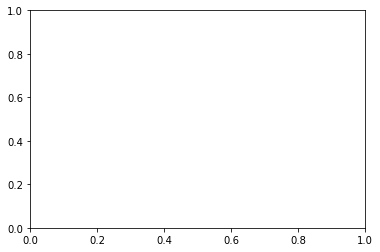

In [75]:
import matplotlib.pyplot as plt
plt.plot(new_df["DeliveryDays"], new_df["ID"])
